<a href="https://colab.research.google.com/github/nishant0708/datascience-lab-ass/blob/main/dataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1: Basics of Coding R/Python

Q1.1 Using Comments R/Python


In [ ]:
# This is a single-line comment in Python

Q 1.2 Executing Commands R/Python


In [ ]:
command = "print('Hello, Python!')"
exec(command)


Hello, Python!


Q1.3 Importing Packages R/Python

In [ ]:
import pandas as pd

Q1.4 Getting Data into R/Python

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

Q1.5 Saving Output R/Python


In [ ]:
df.to_csv("output.csv", index=False)

Q1.6 Accessing Records and Variables R/Python

In [ ]:
record = df.iloc[0]


#**2**: DATA PREPARATION





Q2.1 How to Add an Index Field Using R/Python


In [ ]:
df['index_field'] = range(1, len(df) + 1)

Q2.2 How to Change Misleading Field Values Using R/Python


In [ ]:
df['column_name'].replace({'misleading_value': 'correct_value'}, inplace=True)

Q2.3 How to Re Express Categorical Field Values Using R/Python


In [ ]:
df['column_name'] = df['column_name'].map({'category1': 'new_value1', 'category2': 'new_value2'})

Q2.4 How to Standardise Numeric Fields Using R/Python


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['numeric_column'] = scaler.fit_transform(df[['numeric_column']])

Q2.5How to Identify Outliers Using R/Python


In [ ]:
import pandas as pd
from scipy import stats

z_scores = stats.zscore(df['median_income'])
outliers = (z_scores > 3) | (z_scores < -3)
df_outliers = df[outliers]

#3: EXPLORATORY DATA ANALYSIS

3.1  How to Construct a Bar Graph with Overlay Using R/Python



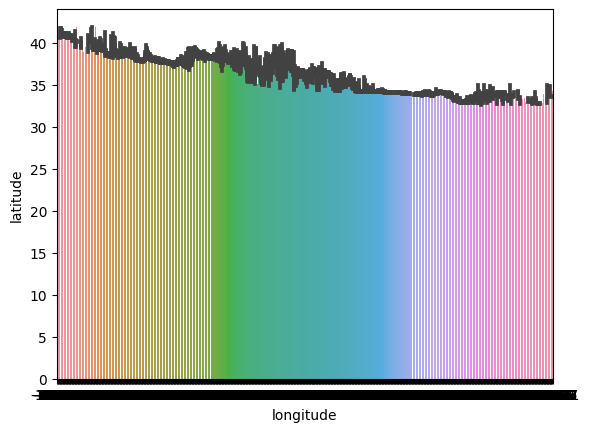

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv('/content/sample_data/california_housing_train.csv')


sns.barplot(x='longitude', y='latitude', data=df)
plt.show()

Q3.2 How to Construct Contingency Tables Using R/Python


In [ ]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')
contingency_table = pd.crosstab(df['housing_median_age'], df['total_rooms'])
print(contingency_table)

total_rooms         2.0      8.0      11.0     12.0     15.0     18.0     \
housing_median_age                                                         
1.0                       0        0        0        0        0        0   
2.0                       0        0        0        0        0        0   
3.0                       0        0        0        0        0        0   
4.0                       1        0        0        0        0        1   
5.0                       0        0        0        0        0        0   
6.0                       0        0        0        0        0        0   
7.0                       0        0        0        0        0        0   
8.0                       0        0        0        0        0        0   
9.0                       0        0        0        0        0        0   
10.0                      0        0        0        0        0        0   
11.0                      0        0        0        0        0        0   
12.0        

Q3.3 How to Construct Histograms with Overlay Using R/Python


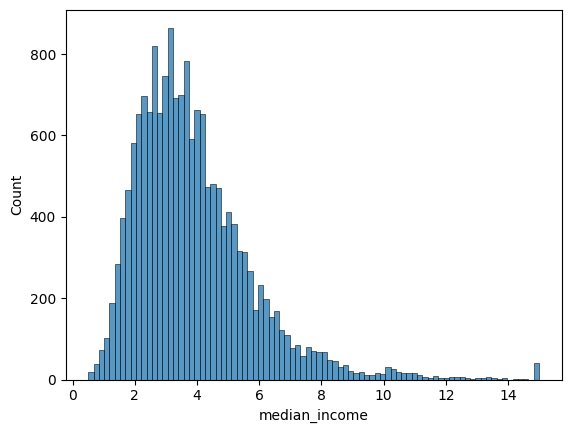

In [ ]:
sns.histplot(data=df, x='median_income', multiple="stack")
plt.show()

Q3.4 How to Perform Binning Based on Predictive Value Using R/Python


In [ ]:
df['household_bin'] = pd.cut(df['households'], bins=3, labels=False)
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households median_income  median_house_value  household_bin  
0      1015.0       472.0           Low             66900.0              0  
1      1129.0       463.0           Low             80100.0              0  
2       333.0       117.0           Low             85700.0              0  
3       515.0       226.0           Low             73400.0              0  
4       624.0       262.0           Low             65500.0              0  


#4:    DATA PREPARATION PHASE TO MODEL THE DATA

Q4.1 How to Partition the Data R/Python


In [ ]:
from sklearn.model_selection import train_test_split
seed=123
train_data, test_data = train_test_split(df, test_size=0.2, random_state=seed)

Q4.2 How to Balance the Training Data Set R/Python

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


majority_class = df[df['median_income'] == 'majority_class']
minority_class = df[df['median_income'] == 'minority_class']

minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=123)


balanced_train_data = pd.concat([majority_class, minority_upsampled])

print(balanced_train_data['median_income'].value_counts())

Low       0
Medium    0
High      0
Name: median_income, dtype: int64


Q4.3  How to Build CART Decision Trees Using R/Python

|--- median_house_value <= 254150.00
|   |--- median_house_value <= 214450.00
|   |   |--- median_house_value <= 164650.00
|   |   |   |--- housing_median_age <= 16.50
|   |   |   |   |--- total_bedrooms <= 376.50
|   |   |   |   |   |--- total_rooms <= 2283.50
|   |   |   |   |   |   |--- total_rooms <= 1851.50
|   |   |   |   |   |   |   |--- housing_median_age <= 2.50
|   |   |   |   |   |   |   |   |--- median_house_value <= 73750.00
|   |   |   |   |   |   |   |   |   |--- class: Medium
|   |   |   |   |   |   |   |   |--- median_house_value >  73750.00
|   |   |   |   |   |   |   |   |   |--- class: Low
|   |   |   |   |   |   |   |--- housing_median_age >  2.50
|   |   |   |   |   |   |   |   |--- longitude <= -115.44
|   |   |   |   |   |   |   |   |   |--- total_bedrooms <= 246.50
|   |   |   |   |   |   |   |   |   |   |--- total_rooms <= 1508.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- total_roo

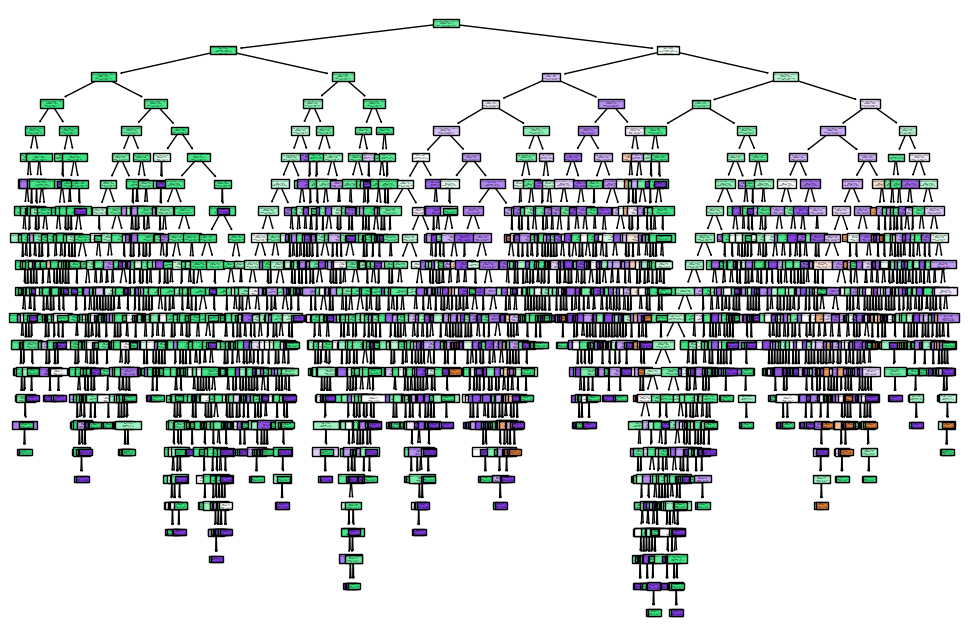

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn import datasets


X = df.drop('median_income', axis=1)
y = df['median_income']
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

tree_rules = export_text(tree_model, feature_names=list(X.columns))
print(tree_rules)


from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=list(X.columns), class_names=list(map(str, tree_model.classes_)), filled=True)
plt.show()


Q4.4 How to Build C5.0 Decision Trees Using R/Python


In [ ]:

from c50 import C50


X = df.drop('median_income', axis=1)
y = df['median_income']
tree_model = C50.C50Classifier()
tree_model.fit(X, y)

print(tree_model.tree_)


Q4.5 How to Build Random Forests R/Python


In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd


X = df.drop('median_income', axis=1)
y = df['median_income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, predictions))




Accuracy: 0.9126470588235294


#5: MODEL EVALUATION


Q5.1 How to Perform Model Evaluation Using R/Python

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd


df['target_class'] = (df['median_house_value'] > 100000).astype(int)


numeric_columns = df.select_dtypes(include=['number']).columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns


df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)


label_encoder = LabelEncoder()
for col in numeric_columns:
    if df[col].nunique() < len(df) / 2:
        df[col] = label_encoder.fit_transform(df[col])


X = df.drop(['median_house_value', 'target_class'], axis=1)
y = df['target_class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[ 339  269]
 [  66 2726]]

Accuracy: 0.9014705882352941
Precision: 0.9101836393989984
Recall: 0.9763610315186246
F1 Score: 0.942111629514429


Q5.2 Accounting for Unequal Error Costs Using R/Python

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

df=pd.read_csv('/content/sample_data/california_housing_train.csv')

df['target_class'] = (df['median_house_value'] > 100000).astype(int)


X = df.drop(['median_house_value', 'target_class'], axis=1)
y = df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


logreg_model = LogisticRegression()


logreg_model.fit(X_train, y_train)


predictions = logreg_model.predict(X_test)


cost_fp = 1
cost_fn = 5


threshold = cost_fn / (cost_fp + cost_fn)


adjusted_predictions = (logreg_model.predict_proba(X_test)[:, 1] > threshold).astype(int)


conf_matrix = confusion_matrix(y_test, adjusted_predictions)
classification_rep = classification_report(y_test, adjusted_predictions)


print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[ 524   84]
 [ 572 2220]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.86      0.62       608
           1       0.96      0.80      0.87      2792

    accuracy                           0.81      3400
   macro avg       0.72      0.83      0.74      3400
weighted avg       0.88      0.81      0.83      3400



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



#6: NAÏVE BAYES CLASSIFICATION



Q6.1 Demonstrate application of Naïve Bayes Using R/Python


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df['target_class'] = (df['median_house_value'] > 100000).astype(int)


X = df.drop(['median_house_value', 'target_class'], axis=1)
y = df['target_class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

nb_model = GaussianNB()


nb_model.fit(X_train, y_train)


predictions = nb_model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)


print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 1.0

Confusion Matrix:
[[3400]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3400

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400



#7: NEURAL NETWORKS

Q7.1 Demonstrate application of NEURAL NETWORKS using R/Python

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


df['target_class'] = (df['median_house_value'] > 100000).astype(int)


X = df.drop(['median_house_value', 'target_class'], axis=1)
y = df['target_class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=123)


nn_model.fit(X_train_scaled, y_train)


predictions = nn_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)


print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 1.0

Confusion Matrix:
[[3400]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3400

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400



#8: CLUSTERING

Q8.1 Demonstrate  application of k‐MEANS CLUSTERING Using R/Python

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


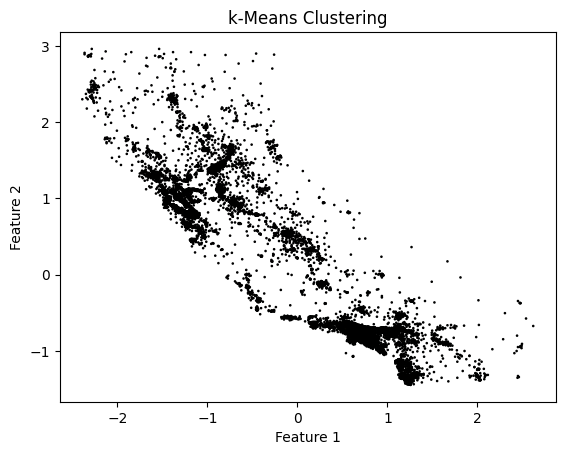

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df['target_class'] = (df['median_house_value'] > 100000).astype(int)


X = df.drop(['median_house_value', 'target_class'], axis=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


num_clusters = 3

kmeans_model = KMeans(n_clusters=num_clusters, random_state=123)


kmeans_model.fit(X_scaled)


cluster_assignments = kmeans_model.labels_


df['cluster'] = cluster_assignments


plt.scatter(X_scaled[:, 0], X_scaled[:, 1],s=0.75, c=cluster_assignments, cmap='viridis', edgecolors='k')
plt.title('k-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#9: REGRESSION MODELLING

Q9.1 Demonstrate Estimation Model Evaluation Using R/Python


Mean Squared Error (MSE): 355340016682167.56
Mean Absolute Error (MAE): 1678747.0606196616
R-squared (R2): -353005506.5115061


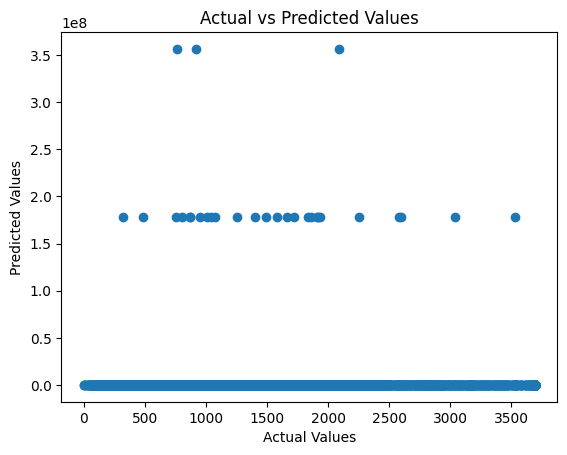

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df['target_class'] = (df['median_house_value'] > 100000).astype(int)

X = df.drop(['median_house_value', 'target_class'], axis=1)
y = df['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


model = LinearRegression()


model.fit(X_train, y_train)


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


Q9.2 Demonstrate Stepwise Regression Using R/Python


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt


df['target_class'] = (df['median_house_value'] > 100000).astype(int)


X = df.drop(['median_house_value', 'target_class'], axis=1)
y = df['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


model = LinearRegression()


sfs = SequentialFeatureSelector(model, forward=True, scoring='neg_mean_squared_error', cv=5)
sfs.fit(X_train, y_train)


selected_features = X_train.columns[list(sfs.k_feature_idx_)]


model.fit(X_train[selected_features], y_train)


predictions = model.predict(X_test[selected_features])


mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print("Selected Features:", selected_features)
print("\nMean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Selected Features: Index(['median_income_Medium'], dtype='object')

Mean Squared Error (MSE): 764644.0819605255
Mean Absolute Error (MAE): 699.7234646656487
R-squared (R2): 0.24037946882977435


#10: DIMENSION REDUCTION DIMENSION REDUCTION

Q10.1 Demonstrate How you will  Identify Multicollinearity R/Python


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df=pd.read_csv('/content/sample_data/california_housing_train.csv')
df['target_class'] = (df['median_house_value'] > 100000).astype(int)


X = df.drop(['median_house_value', 'target_class'], axis=1)


X = sm.add_constant(X)


vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)


             Variable           VIF
0               const  16870.197224
1           longitude      8.827117
2            latitude      8.948206
3  housing_median_age      1.262931
4         total_rooms     12.458147
5      total_bedrooms     36.966844
6          population      6.525253
7          households     37.135973
8       median_income      1.738079


Q10.2  Demonstrate HOW you’ll apply PRINCIPAL COMPONENTS ANALYSIS Using R/Python


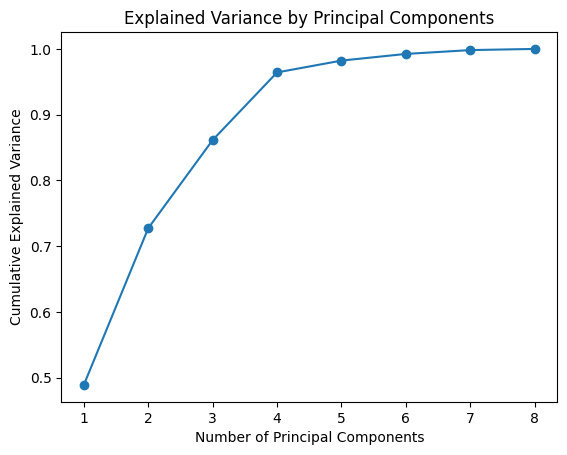

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df['target_class'] = (df['median_house_value'] > 100000).astype(int)


X = df.drop(['median_house_value', 'target_class'], axis=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_


cumulative_explained_variance = explained_variance_ratio.cumsum()


plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()


#11: LOGISTIC REGRESSION MODELLING

Q11.1 How to Perform Logistic Regression Using R/Python


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


df['target_class'] = (df['median_house_value'] > 100000).astype(int)


X = df.drop(['median_house_value', 'target_class'], axis=1)
y = df['target_class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg_model = LogisticRegression()

logreg_model.fit(X_train_scaled, y_train)


predictions = logreg_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.8835294117647059

Confusion Matrix:
[[ 340  268]
 [ 128 2664]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.56      0.63       608
           1       0.91      0.95      0.93      2792

    accuracy                           0.88      3400
   macro avg       0.82      0.76      0.78      3400
weighted avg       0.88      0.88      0.88      3400



Q11.2 How to Perform Poisson Regression Using R/Python


In [ ]:
import pandas as pd
import statsmodels.api as sm




X = df.drop(['median_house_value', 'target_class'], axis=1)
y = df['median_house_value']


X = sm.add_constant(X)


poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:     median_house_value   No. Observations:                17000
Model:                            GLM   Df Residuals:                    16991
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8757e+08
Date:                Tue, 05 Dec 2023   Deviance:                   3.7491e+08
Time:                        19:30:21   Pearson chi2:                 4.27e+08
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.6558      0

#12: ASSOCIATION RULES

Q12.1  How to Mine Association Rules Using R/Python


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules



df['target_class'] = (df['median_house_value'] > 100000).astype(int)


X = df.drop(['median_house_value', 'target_class'], axis=1)



X_binary = X.applymap(lambda x: 1 if x > X.mean().mean() else 0)

data_for_rules = pd.concat([X_binary, df['target_class']], axis=1)


frequent_itemsets = apriori(data_for_rules, min_support=0.1, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                        antecedents  \
0                  (total_bedrooms)   
1                      (population)   
2                     (total_rooms)   
3                      (households)   
4                    (target_class)   
..                              ...   
118        (households, population)   
119  (target_class, total_bedrooms)   
120    (total_bedrooms, population)   
121                    (households)   
122                (total_bedrooms)   

                                           consequents  antecedent support  \
0                                        (total_rooms)            0.263588   
1                                        (total_rooms)            0.846059   
2                                         (population)            0.949294   
3                                        (total_rooms)            0.225176   
4                                        (total_rooms)            0.822529   
..                                                 ...         

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Q 12.2  How to Apply the Confidence Difference Criterion Using R/Python

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


df['target_class'] = (df['median_house_value'] > 100000).astype(int)


X = df.drop(['median_house_value', 'target_class'], axis=1)


X_binary = X.applymap(lambda x: 1 if x > X.mean().mean() else 0)


data_for_rules = pd.concat([X_binary, df['target_class']], axis=1)


frequent_itemsets = apriori(data_for_rules, min_support=0.1, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


rules['confidence_diff'] = rules.apply(lambda row: row['confidence'] - rules[rules['consequents'] == row['consequents']]['confidence'].mean(), axis=1)


filtered_rules = rules[rules['confidence_diff'] > 0.1]

print(filtered_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric, confidence_diff]
Index: []


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Q 12.3  How to Apply the Confidence Quotient Criterion Using R/Python

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


df['target_class'] = (df['median_house_value'] > 100000).astype(int)


X = df.drop(['median_house_value', 'target_class'], axis=1)


X_binary = X.applymap(lambda x: 1 if x > X.mean().mean() else 0)


data_for_rules = pd.concat([X_binary, df['target_class']], axis=1)

frequent_itemsets = apriori(data_for_rules, min_support=0.1, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


rules['confidence_quotient'] = rules.apply(lambda row: row['confidence'] / rules[rules['antecedents'] == row['antecedents']]['confidence'].mean(), axis=1)


filtered_rules = rules[rules['confidence_quotient'] > 1.2]


print(filtered_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric, confidence_quotient]
Index: []


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
!jupyter nbconvert --to html Untitled0.ipynb

[NbConvertApp] Converting notebook Untitled0.ipynb to html
[NbConvertApp] Writing 1459876 bytes to Untitled0.html
